# NTDS assignment 2: network models
[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), *PhD student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

For this assignment we will work on a network representing the collaboration between scientists in the field of General Relativity and Quantum Cosmology. The network comes from [SNAP](http://snap.stanford.edu/data/ca-GrQc.html) and is described as follows:

> Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print [arXiv](https://arxiv.org) and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author *i* co-authored a paper with author *j*, the graph contains a undirected edge from *i* to *j*. If the paper is co-authored by *k* authors this generates a completely connected (sub)graph on *k* nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv.

In [1]:
%matplotlib inline

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
G = nx.read_edgelist(os.path.join('arxiv_collaboration_network.txt'))

In [3]:
print('My network has {} nodes.'.format(len(G.nodes())))
print('My network has {} edges.'.format(G.size()))

My network has 5242 nodes.
My network has 14496 edges.


## 1. Comparing to model networks

# 1.1
In this part of the assignment, you have to create an Erdős–Rényi and Barabási-Albert graph using NetworkX, and compare them to the collaboration network. Try to simulate the original network as best as you can. When choosing parameters for the networks, take into account the number of vertices and edges of the original network. The number of vertices should be exactly the same. Comment on your choice of parameters.

<span style="color:red">**Your answer here.**</span>

In [4]:
G_num_nodes = len(G.nodes())
G_num_edges = G.size()

### With Erdős–Rényi graph:
each node has a probability p to be connected to another node. 

As a result we can compute the average number of edges:

$<L> = p \frac{N\cdot (N-1)}{2}$

#### where :

\*$p$ : the probability that there is an edge between two nodes (What we looking for)

\*$<L>$ : the average number of links (or edges) in the graph

\*$N$ : the number of nodes

<br/>

As $<L>$ and $N$ are known, we can compute the probability p : 

$p = \frac{2\cdot<L>}{N\cdot (N-1)}$

In [5]:
# probality p of the Erdős–Rényi graph
p_edge = 2 * G_num_edges / (G_num_nodes * (G_num_nodes - 1))

p_edge

0.001055278280507905

In [6]:
er = nx.erdos_renyi_graph(G_num_nodes, p_edge)

### With Barabási-Albert graph 

It's quite straightforward to compute the unknown parameter m which is the number of new links added.

Note: we need an integer, so we round our estimation.

In [7]:
t = G_num_nodes
m = round((G_num_edges) / t)

t, m

(5242, 3)

In [8]:
ba = nx.barabasi_albert_graph(t, m)

In [9]:
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))

My Erdős–Rényi network has 5242 nodes.
My Erdős–Rényi network has 14550 edges.
My Barabási-Albert network has 5242 nodes.
My Barabási-Albert network has 15717 edges.


#### The number of nodes of both graphs are as close as possible to the original graph $G$ !

# 1.2 
Check the size of the largest connected component in each graph and compare them to the original network. In the Erdős–Rényi model, what should the probability of creating each edge be in order to have the same expected size of the largest component? Justify. Generate a graph with this parameter to check if you indeed get a similar value.

In [10]:
giant_G = max(nx.connected_component_subgraphs(G), key=len)
giant_er = max(nx.connected_component_subgraphs(er), key=len)
giant_ba = max(nx.connected_component_subgraphs(ba), key=len)
print(len(giant_G.nodes()))
print(len(giant_er.nodes()))
print(len(giant_ba.nodes()))

4158
5220
5242


<span style="color:red">**Your answer here.**</span>

From the lecture (02_RandomNetworks-NTDS2017.pdf, slides 19 -> 22) : 

$ <k> = p \cdot (N - 1) $

$ S = \frac{N_g}{N} $

#### where :

\*$p$ : the probability that there is an edge between two nodes (What we looking for)

\*$<k>$ : the average degree

\*$N_g$ : the number of nodes in the giant componant

\*$N$ : the number of nodes


<br/>

Using:

$ S = 1 - e^{-<k> \cdot S} $

We can conclude that :

$ p = - \log(1 - \frac{N_g}{N}) \cdot \frac{N}{Ng \cdot (N - 1)} $



In [11]:
# Setting variables with name according to the theory
N = G_num_nodes
Ng = len(giant_G.nodes())

N, Ng

(5242, 4158)

In [12]:
# Computing p_giant
p_giant = - np.log(1 - Ng/N) * N / (Ng * (N - 1))
p_giant

0.00037911157202514915

In [13]:
# Creating the new ER graph with p_giant
er_2 = nx.erdos_renyi_graph(N, p_giant)

# Finding the GC
er_giant =  max(nx.connected_component_subgraphs(er_2), key=len)

In [14]:
# Checking if it works
print('The parameter p for an Erdős–Rényi network with the same expected size of the giant component is {}.'.format(p_giant))
print('The size of the component in a randomly generated network with this parameter is {}.'.format(len(er_giant.nodes())))

The parameter p for an Erdős–Rényi network with the same expected size of the giant component is 0.00037911157202514915.
The size of the component in a randomly generated network with this parameter is 4033.


#### Perfect ! we have a GC of the same size (roughly)

# 1.3 
Look at the clustering coefficient of the original network. Is there a network model we talked about that could have a clustering coefficient that is close? Explain.

In [15]:
nx.average_clustering(G)

0.529635811052136

<span style="color:red">**Your answer here.**</span>

### the Watts-Strogatz Model

This model with p = 0 (probability of rewiring an edge in the regular ring lattice) we have a clustering coefficient of $\frac{3}{4}$ when the average degree is large. 

Hence by increasing p, short path lengths and high clustering can coexist in the network.

** Bonus: **

By playing a bit with $p$ of the Watts-Strogratz model one can easily get a cluster coefficient close to the graph $G$ with the same numbers of nodes and the same average degree, which is order of magnitude closer than previous random graph :

In [16]:
k = int(np.round(np.mean(list(nx.degree(G).values()))))
k

6

In [17]:
ws = nx.watts_strogatz_graph(N, k, 4e-02)

In [18]:
# printing average clusting of the graphs created in part 1

for g in [er, er_2, ba, ws]:
    print(nx.average_clustering(g))

0.0010655873017567023
0.00012717792191275593
0.008262092391400824
0.5314090102529372


Please note that this graph ($ws$) is still different in many ways than the original one $G$

## 2. Creating a network with a predefined degree distribution

In this part of the assignment, you will have to create a random network from a predefined degree distribution. There are several network models which can create a random network with the exact same degree distribution as the original, or with the same expected distribution as the original. Refer to section 4.8 of [the Barabási book](http://networksciencebook.com) for more information.

One of the most famous ones is the configuration model. The model for a graph with $L$ edges in total is constructed in the following steps:

- Assign a degree to each node, represented as stubs (half-links). The degree sequence is either generated analytically from a preselected distribution, or it is extracted from the adjacency matrix of a real network. Note that we must start from an even number of stubs to avoid being left with unpaired stubs.
- Randomly select a stub pair and connect them. Then randomly choose another pair from the remaining $2L - 2$ stubs and connect them. This procedure is repeated until all stubs are paired up.

*Reminder:* A stub is a half-link, representing the half of an edge. It contains one node and can be paired up with another stub to create an edge (between the two corresponding nodes).

# 2.1 
However, this model allows for the creation of multi-links (multiple edges between the same pair of vertices) and self-loops, thus leading to a non-simple graph. In this assignment, you will implement a greedy configuration model, to avoid these problems.

The algorithm goes as follows:
- Extract the degree sequence from our collaboration network.
- Assign a target degree to each node, represented as stubs or half-links. Use the degree sequence extracted from the collaboration network.
- Sort the nodes by degree. 
    - Pick the node with the highest target degree. Delete all its stubs from the list of stubs to make sure we don't create a self loop.
    - Until all its weighted degree equals its target degree: 
        - Randomly select one stub from the list of stubs (corresponding to one of the other nodes), and connect these two nodes. In case the two chosen nodes are already connected, simply increase the weight of this edge by one. Be careful to randomly select from stubs and not from nodes, as this means the chances of selecting a node will be proportional to its target degree.
    - When the number of edges adjacent to this node corresponds to its target degree, go on to the second node in the list. 
    - Repeate this procedure until all stubs are paired up, or there is only one node left with a pair number of stubs. In that case, don't create a self-loop, but discard the stubs.
    
*Hints*: 
 - Use `nx.empty_graph()` to create an empty graph.
 - Use `G.add_edge(node1,node2,weight = 1)` to add an edge to a weighted graph.
 - Use `G.edge[node1][node2]['weight'] += 1` to increment the weight of an edge by one.

<span style="color:red">**Your answer here.**</span>

helper function to create a "stubs list"

In [19]:
# given a degree distribution of nodes it returns a list of stubs using each the distribution index as node value
# ex: [3, 2, 1] -> [0, 0, 0, 1, 1, 2]
# an offset can be added to the nodes

def deg_dist_to_stubs(degree_distribution, offset=0):
    return [i+offset for i, deg in enumerate(degree_distribution) for _ in range(deg)]

#### Implementation of the greedy configuration as close as possible to the algorithm asked

In [20]:
def greedy_configuration(degree_distribution):
    N = len(degree_distribution)
    G = nx.empty_graph(N)
    
    # in order to keep the original untouched (no unwanted side-effect)
    remaining_deg_dist = degree_distribution.copy()
    
    for node in range(N):
        # deg_dist is the remaining degrees
        deg, *deg_dist = remaining_deg_dist[node:]
        
        # check if there are not stubs to assigned for this node 
        if deg > 0:

            # we create a list of stubs from which we will randomly pick #stubs equal to the degree (deg)
            stubs = deg_dist_to_stubs(deg_dist, node+1)
        
            for linked_node in np.random.choice(stubs, size=deg, replace=False):
                # we reduce the degree when a stub has been linked
                remaining_deg_dist[linked_node] -= 1
                
                if linked_node in G.edge[node]:
                    # if the edge already exists we simply increase the weight
                    G.edge[node][linked_node]['weight'] += 1
                else:
                    G.add_edge(node, linked_node, weight=1)
    return G

In [21]:
degree_distribution=sorted(nx.degree(G).values(), reverse=True) # degree distribution sorted from highest to lowest
gc = greedy_configuration(degree_distribution)

# 2.2
Verify that the networks have the same number of nodes. Plot the difference between the weighted degree distributions to verify that they are identical. If not, why?

In [22]:
degree_sequence_gc=sorted(nx.degree(gc, weight = 'weight').values(),reverse=True) #weighted degree distribution
# Your code here.

degree_diff = np.array(degree_distribution) != np.array(degree_sequence_gc)

assert degree_diff.sum() == 0, "Degree distribution of both graphs should be similar"

There are no differences as expected

# 2.3 
Should these two networks have the same adjacency matrices? Justify.

<span style="color:red">**Your answer here.**</span>

No, or at least with very low probability. Why? Although we are keeping the degree distribution, the edges are created randomly (weighted with the degree distribution) between all nodes, hence we shouldn't expect same adjacency matrices.

Example:

In [23]:
N = len(degree_distribution)
deg = degree_distribution[0]

deg, N, N - deg

(81, 5242, 5161)

Node 0 has a degree of 81, it means it's connected with 81 other nodes out of the 5241 nodes. As we are rewiring nodes randomly (by taking into account their degrees) we have high probability of choosing any of the 5161 other nodes which would lead to a different adjacency matrix.

Let's just verify that

In [24]:

differences = np.nonzero(nx.adjacency_matrix(G) - nx.adjacency_matrix(gc))

len(differences[0]), differences[0]

(57572, array([   0,    0,    0, ..., 5241, 5241, 5241], dtype=int32))

Indeed the matrices are absolutely different

# 2.4 
Draw both the generated and original networks. Are they similar? If not, why? Try to explain.

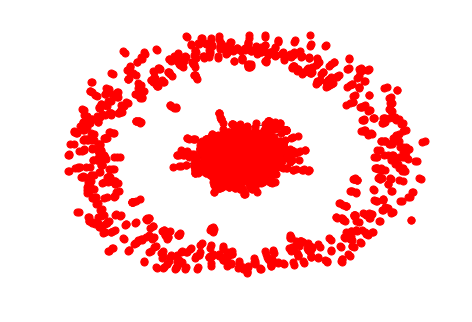

In [25]:
nx.draw(G, node_size=50, width=0.6)

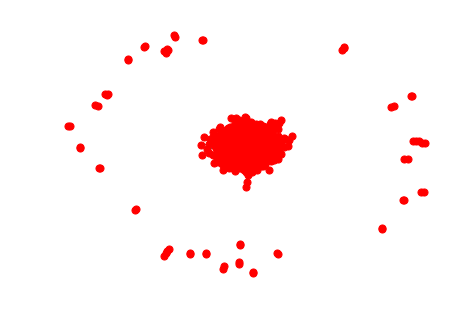

In [26]:
nx.draw(gc, node_size=50, width=0.6)

<span style="color:red">**Your answer here.**</span>

Both graphs are different but not totally, they both have a rather big giant cluster but the one of G is smaller. In other words, the preferential attachment to the second graph is way higher.

The G graph contains many more subclusters of reasonable size. (we cannot very easily see it but in part 2.5 it has been computed, see #connected components)

In general we should understand that having the exact same degree distribution between two graphs doesn't make the two graphs the same.

# 2.5
Do you expect the properties studied in the first part of the assignment to be close to the original graph? Justify.

<span style="color:red">**Your answer here.**</span>

Number of nodes and edges are the same by construction. But this doesn't not imply that other properties will follow as we have seen in part 1.

(please note that : there are less edges but by taking into account their weight we would have the same number)
 
From the graph, we have seen that the preferential attachment is higher in $gc$, hence we will have a bigger GC.

About the clustering coefficient, we know that in real world graphs (such as social networks), the clustering is rather high (just like for $G$). But we construct $gc$ with randomness in mind and random networks tend to have a rather low clustering coefficient. So we can guess that clustering coefficient will be smaller in $gc$.

Let's verify our assumptions and show some properties for each graph.

In [27]:
def print_properties(G):
    print('Network has {} nodes.'.format(len(G.nodes())))
    print('Network has {} edges.'.format(G.size()))
    connected_components = list(nx.connected_component_subgraphs(G))
    print('Network has {} connected components'.format(len(connected_components)))
    giant_G = max(connected_components, key=len)
    print('Network has GC of size = {}'.format(len(giant_G.nodes())))
    print('Network has clustering coefficient = {}'.format(nx.average_clustering(G)))

In [28]:
print_properties(G)

Network has 5242 nodes.
Network has 14496 edges.
Network has 355 connected components
Network has GC of size = 4158
Network has clustering coefficient = 0.529635811052136


In [29]:
print_properties(gc)

Network has 5242 nodes.
Network has 14428 edges.
Network has 30 connected components
Network has GC of size = 5179
Network has clustering coefficient = 0.00622168742916021
